![DSA](imagens/Projeto5.png)

## Instalando e Carregando os Pacotes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/CursoIACyber
!ls

/content/drive/MyDrive/CursoIACyber
dados  modelos	Projeto5.ipynb	Projeto9.ipynb


In [ ]:
# Para corrigir bug com um dos algoritmos
!pip install -U -q threadpoolctl

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
# Imports
import sklearn
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from pylab import rcParams
rcParams["figure.figsize"] = 14,8
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

In [ ]:
# Carrega os dados
df = pd.read_csv("dados/dataset.csv", sep = ',')

In [ ]:
# Shape
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Análise Exploratória

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Verifica se há valores ausentes
df.isnull().sum().max()

0

Text(0, 0.5, 'Frequência')

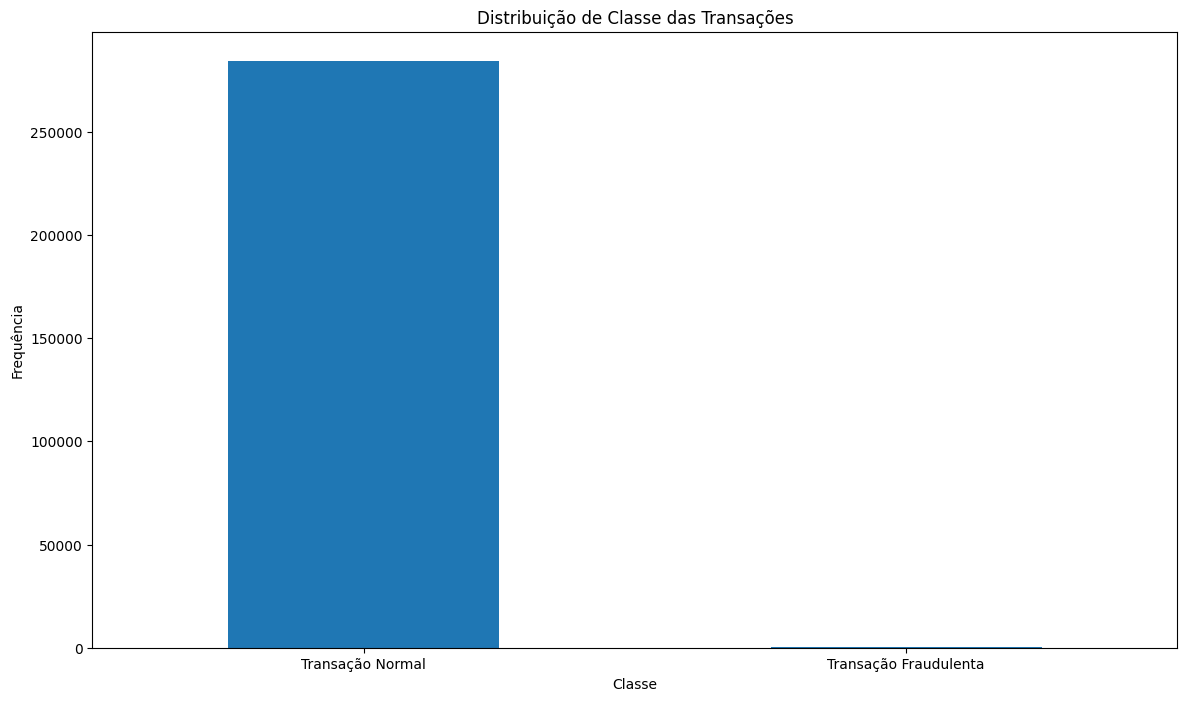

In [ ]:
# Plot
# 0 significa: Transação Normal
# 1 significa: Transação Fraudulenta
LABELS = ["Transação Normal", "Transação Fraudulenta"]
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Distribuição de Classe das Transações")
plt.xticks(range(2), LABELS)
plt.xlabel("Classe")
plt.ylabel("Frequência")

In [ ]:
# Fraude
fraude = df[df["Class"]==1]

In [ ]:
# Normal
normal = df[df["Class"]==0]

In [ ]:
print(fraude.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
# Em valor percentual
print("Transações Normais:", round(df["Class"]. value_counts()[0]/len(df)*100,2), "% dos dados")
print("Transações Fraudulentas", round(df["Class"]. value_counts()[1]/len(df)*100,2), "% dos dados")

Transações Normais: 99.83 % dos dados
Transações Fraudulentas 0.17 % dos dados


In [ ]:
# Resumo estatístico das transações fraudulentas
fraude.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

**Análise**:

A partir desta tabela, podemos verificar que o valor mínimo para transações fraudulentas foi de 0,000 e o valor máximo foi de 2.125,87 dólares. A média de transações fraudulentas foi de $ 122.21 e as transações fraudulentas ocorreram cerca de 492 vezes.

In [ ]:
# Resumo estatístico das transações normais
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Análise**:

A partir desta tabela, podemos verificar que o valor mínimo para transações normais foi de 0,000 e o valor máximo foi de 25.691,16 dólares. A média de transações normais foi de 88.291$ e as transações normais ocorreram cerca de 284.315 vezes.

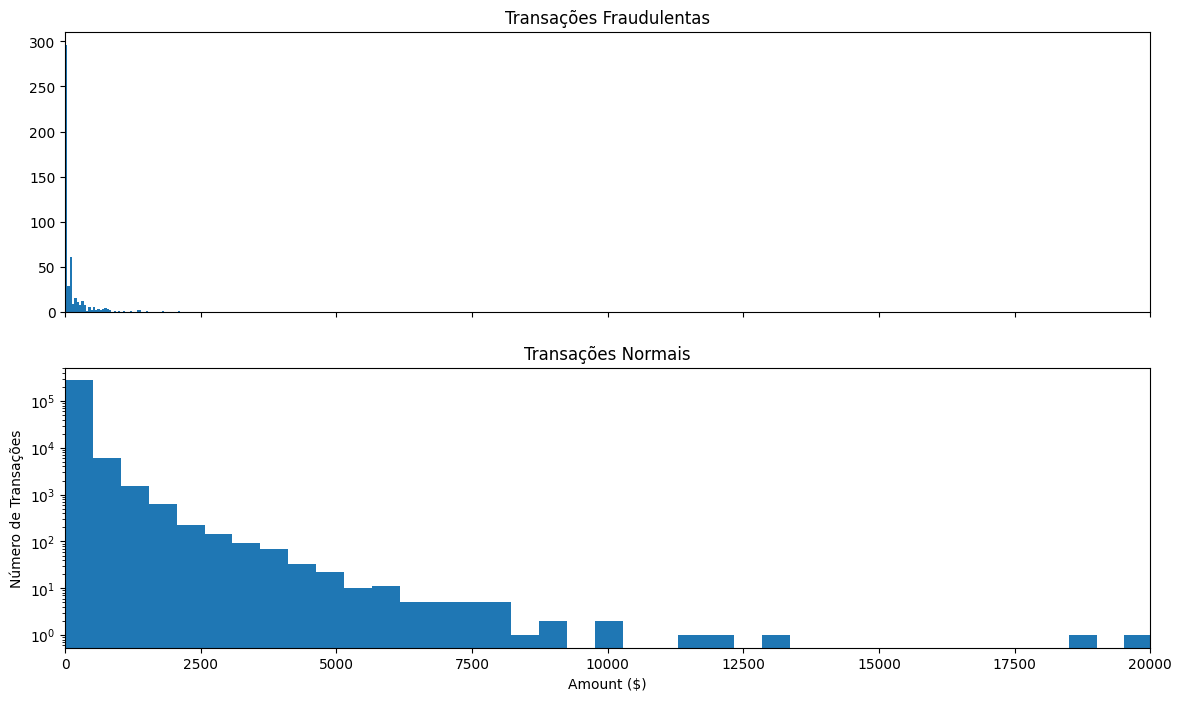

In [ ]:
# Histograma
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
bins = 50
ax1.hist(fraude.Amount, bins = bins)
ax1.set_title('Transações Fraudulentas')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Transações Normais')
plt.xlabel('Amount ($)')
plt.ylabel('Número de Transações')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

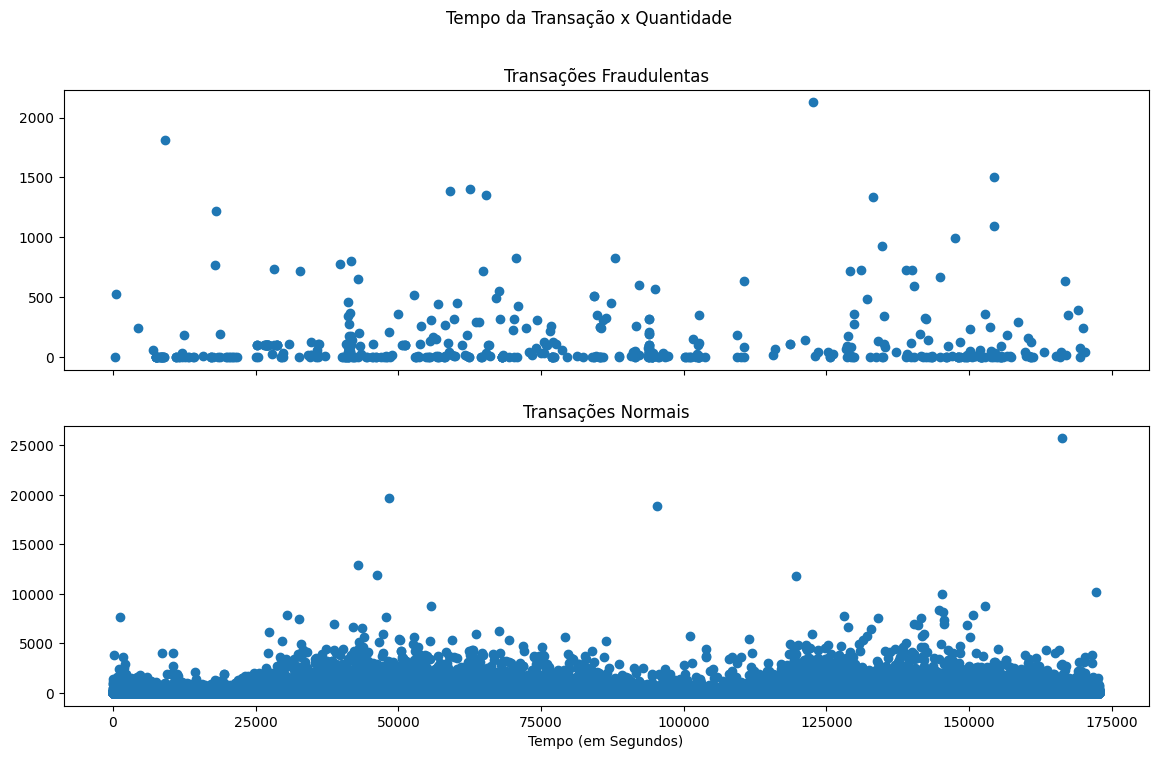

In [ ]:
# Distribuição das transações pelo tempo
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Tempo da Transação x Quantidade')
ax1.scatter(fraude.Time, fraude.Amount)
ax1.set_title('Transações Fraudulentas')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Transações Normais')
plt.xlabel('Tempo (em Segundos)')
plt.show()

In [ ]:
# Vamos extrair uma amostra aleatória de 10% dos dados
amostra = df.sample(frac = 0.1, random_state = 1)

In [ ]:
amostra.shape

(28481, 31)

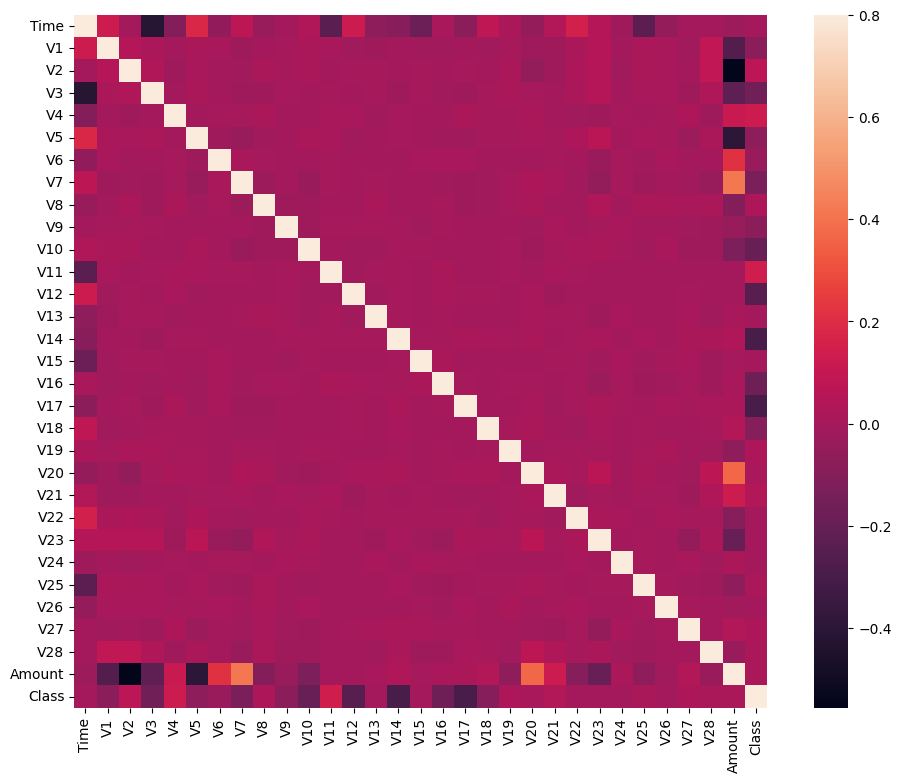

In [ ]:
# Matriz de correlação para a amostra
correlation_matrix = amostra.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(correlation_matrix, vmax = 0.8, square = True)
plt.show()

**Análise**:

A matriz de correlação acima mostra que nenhum dos componentes V1 a V28 tem forte correlação entre si. No entanto, observarmos que a classe tem algumas correlações positivas e negativas com os componentes V, mas não tem forte correlação com o tempo e a quantidade.

## Pré-Processamento de Dados

In [ ]:
# Determinamos o número de fraudes e transações válidas na amostra de dados
Fraude = amostra[amostra['Class']==1]
Valid = amostra[amostra['Class']==0]

In [ ]:
# Fraudes são outliers, vamos calcular a proporção e usar isso mais tarde nos modelos
outlier_fraction = len(Fraude) / float(len(Valid))

In [ ]:
# Imprime a fração e o número de casos de Fraude e Transação Válida
print("\nCasos Fraudulentos : {}".format(len(Fraude)))
print("\nCasos Válidos : {}".format(len(Valid)))
print("\nPercentual de Transações Anormais (Fraudulentas): ", outlier_fraction)


Casos Fraudulentos : 49

Casos Válidos : 28432

Percentual de Transações Anormais (Fraudulentas):  0.0017234102419808666


In [ ]:
# Variáveis preditoras (usaremos todas)
columns = amostra.columns.tolist()

In [ ]:
# Filtra a coluna com a variável target
columns = [c for c in columns if c not in ["Class"]]

In [ ]:
# Define a variável target
target = "Class"

In [ ]:
# Define um random state
state = np.random.RandomState(42)

In [ ]:
# Define x e y
X = amostra[columns]
Y = amostra[target]

In [ ]:
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


## Modelagem

Os algoritmos que decidimos usar para tentar fazer a detecção de anomalias neste conjunto de dados são o algoritmo Isolation Forest e Local Outlier Factor (LOF).

### Isolation Forest Algorithm

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

O Isolation Forest Algorithm é um algoritmo de aprendizado de máquina não supervisionado que é usado principalmente para detecção de anomalias. Ele se baseia na ideia de que as anomalias são poucas e diferentes dos dados normais, portanto, são mais fáceis de isolar. Leia a descrição completa do algoritmo no Capítulo 6 do curso.

### Local Outlier Factor (LOF) Algorithm

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

O Local Outlier Factor (LOF) é um algoritmo de aprendizado de máquina não supervisionado usado para identificar pontos de dados anômalos, também conhecidos como outliers, em um conjunto de dados. O LOF baseia-se na ideia de que os pontos de dados normais tendem a estar próximos uns dos outros em um espaço de atributos, enquanto os outliers estão mais distantes dos pontos de dados normais. O algoritmo estima a densidade local de cada ponto e compara com a densidade dos seus vizinhos para identificar outliers. Leia a descrição completa do algoritmo no Capítulo 6 do curso.

In [ ]:
# Modelos de Detecção de Outliers
classificadores = {

    "Isolation Forest":IsolationForest(n_estimators = 100,
                                       max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state,
                                       verbose = 0),

    "Local Outlier Factor":LocalOutlierFactor(n_neighbors = 10,
                                              algorithm = 'auto',
                                              leaf_size = 30,
                                              metric = 'minkowski',
                                              p = 2,
                                              metric_params = None,
                                              contamination = outlier_fraction)

}

## Loop de Treinamento e Avaliação dos Modelos

In [ ]:
# Dicionários para as métricas
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}

# Loop de treino
for i, (clf_name, clf) in enumerate(classificadores.items()):

    # Fit
    if clf_name == "Local Outlier Factor":

        # Faz previsão com o modelo
        y_pred = clf.fit_predict(X)

        # Calcula o score
        scores_prediction = clf.negative_outlier_factor_

        # Salva o modelo
        modelo_lof = clf

    else:

        # Fit
        clf.fit(X)

        # Score
        scores_prediction = clf.decision_function(X)

        # Previsão
        y_pred = clf.predict(X)

        # Salva o modelo
        modelo_if = clf

    # Reshape dos valores das previsões para 0 (transações válidas) e 1 (transações fraudulentas)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()

    f1_dict[clf_name] = f1_score(y_pred, Y)
    precision_dict[clf_name] = precision_score(y_pred, Y)
    recall_dict[clf_name] = recall_score(y_pred, Y)
    accuracy_dict[clf_name] = accuracy_score(y_pred, Y)


In [ ]:
# Os nomes das chaves serão os nomes dos dicionários
chaves = f1_dict, precision_dict, recall_dict, accuracy_dict

# Métricas
metricas = ['F1_Score', 'Precision', 'Recall', 'Accuracy']

# Dataframe
tabela_metricas = pd.DataFrame(chaves)

# Índice
tabela_metricas.index = metricas

# Tabela de métricas
tabela_metricas

,Isolation Forest,Local Outlier Factor
F1_Score,0.242424,0.020202
Precision,0.244898,0.020408
Recall,0.240000,0.020000
Accuracy,0.997367,0.996594


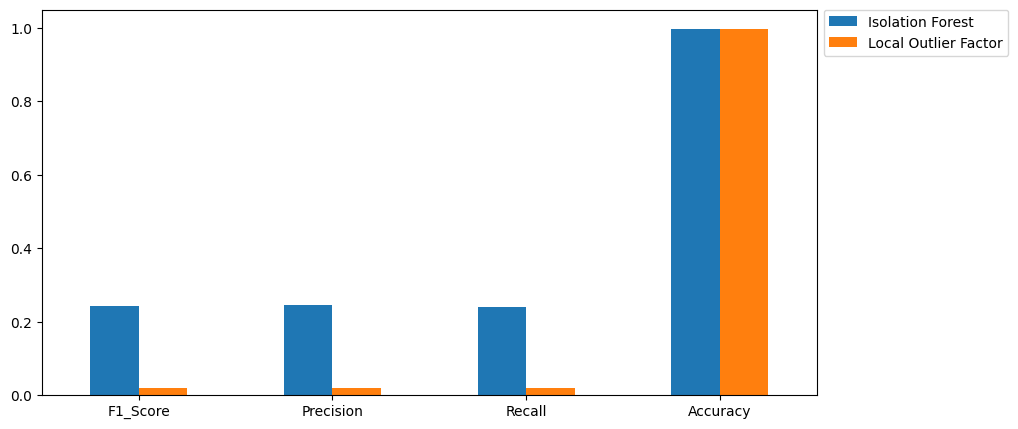

In [ ]:
# Gráfico da tabela de métricas
resultado = tabela_metricas.plot(kind = 'bar', rot = 0, figsize = (10, 5))
resultado.legend(bbox_to_anchor = (1, 1.02), loc = 'upper left');

**Análise**:

Os 2 modelos apresentaram alta acurácia (métrica global), mas valores bem diferentes de precision e recall (métricas locais). A performance do Isolation Forest foi bem superior.

## Prevendo o Status de Novas Transações

In [ ]:
# Dados de uma nova transação
nova_transacao_1 = [911,-0.768413694567017,0.410690439390815,1.88716550025953,1.99865410868397,-0.705465722839156,-0.47964749666651,-0.334048932499172,0.208852613408458,-0.183811279490353,-0.298863813988564,-0.596618154212584,-0.449946622072923,-0.365863811711992,0.053788251094213,1.88605118301105,0.131709122522055,-0.218232404226352,0.717672722726927,0.564070472739341,0.25994316634561,0.212307024345755,0.419830204380409,-0.128308264872461,0.378839529788504,0.149001812536257,-0.192992364852474,0.101799326563349,0.109335203952273,19.98]


In [ ]:
nova_transacao_arr_1 = np.array(nova_transacao_1).reshape(1, -1)

In [ ]:
previsao_1 = modelo_if.predict(nova_transacao_arr_1)

In [ ]:
previsao_1[previsao_1 == 1] = 0
previsao_1[previsao_1 == -1] = 1

In [ ]:
# Resultado
if previsao_1 == 0:
    print("Essa transação não é tentativa de fraude!")
else:
    print("Essa transação é, provavelmente, tentativa de fraude!")

Essa transação não é tentativa de fraude!


# Fim